In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Acquisition and Data Wrangling on Dataset 1

In [609]:
DATA_PATH_1 = r"./data/dataset_1.csv"
data_set_1 = pd.read_csv(DATA_PATH_1)
data_set_1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp'],
      dtype='object')

In [610]:
data_set_1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
dtype: object

In [611]:
data_set_1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22


In [612]:
# yr and the mnth are the unncessary columns in the dataset.
data_set_1.drop(columns = ['yr','mnth'],inplace=True)

In [614]:
# TO check the unique value of season
data_set_1['season'].unique()

array([1])

In [615]:
# Some columns have to rename due to spelling mistakes
data_set_1 = data_set_1.rename(columns={ 
        'dteday' : 'date',
        'hr' : 'hour',
        'weathersit' : 'weather',
        'temp' : 'temperature'})

In [617]:
data_set_1.columns

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature'],
      dtype='object')

In [620]:
data_set_1.shape

(610, 8)

In [622]:
# To check if there is any null values
data_set_1.isnull().sum()

instant        0
date           0
season         0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
dtype: int64

Descriptive Stastics
- Measure of central Tendency
- Measure of Despersion

In [334]:
data_set_1['date'].unique()

array(['01-01-2011', '02-01-2011', '03-01-2011', '04-01-2011',
       '05-01-2011', '06-01-2011', '07-01-2011', '08-01-2011',
       '09-01-2011', '10-01-2011', '11-01-2011', '12-01-2011',
       '13-01-2011', '14-01-2011', '15-01-2011', '16-01-2011',
       '17-01-2011', '18-01-2011', '19-01-2011', '20-01-2011',
       '21-01-2011', '22-01-2011', '23-01-2011', '24-01-2011',
       '25-01-2011', '26-01-2011', '27-01-2011', '28-01-2011'],
      dtype=object)

In [618]:
data_set_1['date'].value_counts().sum()

np.int64(610)

In [336]:
data_set_1[['date','temperature']]

,date,temperature
0,01-01-2011,0.24
1,01-01-2011,0.22
2,01-01-2011,0.22
3,01-01-2011,0.24
4,01-01-2011,0.24
...,...,...
605,28-01-2011,0.18
606,28-01-2011,0.18
607,28-01-2011,0.18
608,28-01-2011,0.22


In [621]:
# maximum temperature within the month
data_set_1['temperature'].max()

np.float64(0.46)

In [624]:
date_and_temp_relation = data_set_1.groupby('date').agg({'temperature' : 'mean'}).reset_index()
date_and_temp_relation

,date,temperature
0,01-01-2011,0.344167
1,02-01-2011,0.363478
2,03-01-2011,0.196364
3,04-01-2011,0.200000
4,05-01-2011,0.226957
5,06-01-2011,0.204348
6,07-01-2011,0.196522
7,08-01-2011,0.165000
8,09-01-2011,0.138333
9,10-01-2011,0.150833


In [625]:
temp_and_hour_relation = data_set_1.groupby('hour').agg({'temperature' : 'mean'}).reset_index()
temp_and_hour_relation

,hour,temperature
0,0,0.180769
1,1,0.174615
2,2,0.175000
3,3,0.167500
4,4,0.179000
5,5,0.160833
6,6,0.160769
7,7,0.159231
8,8,0.165385
9,9,0.180000


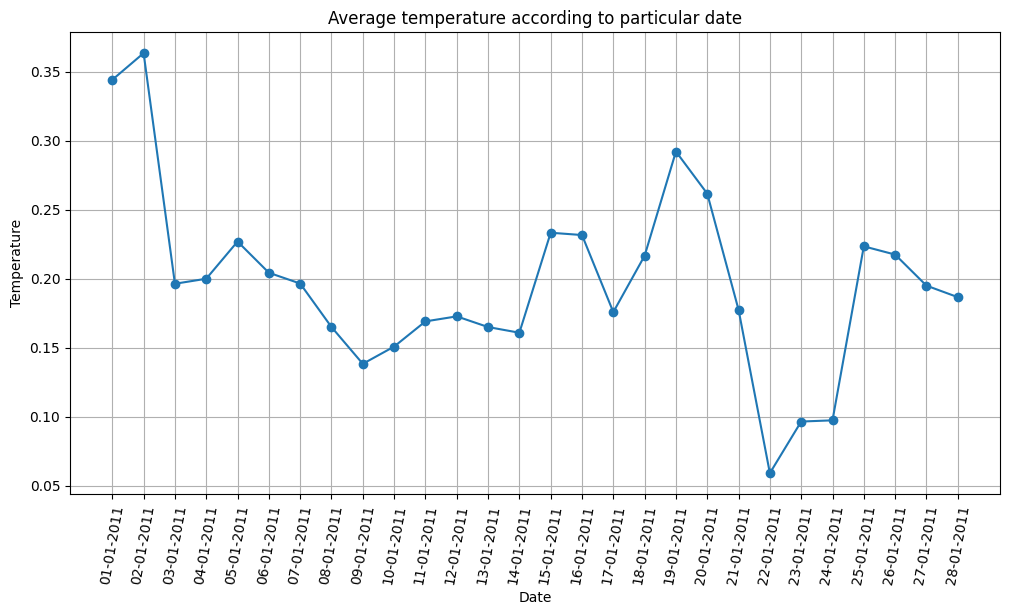

In [626]:
plt.figure(figsize=(12, 6))
plt.plot(date_and_temp_relation['date'],date_and_temp_relation['temperature'],marker='o')
plt.title('Average temperature according to particular date')
plt.xticks(rotation = 80)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid()
plt.show()

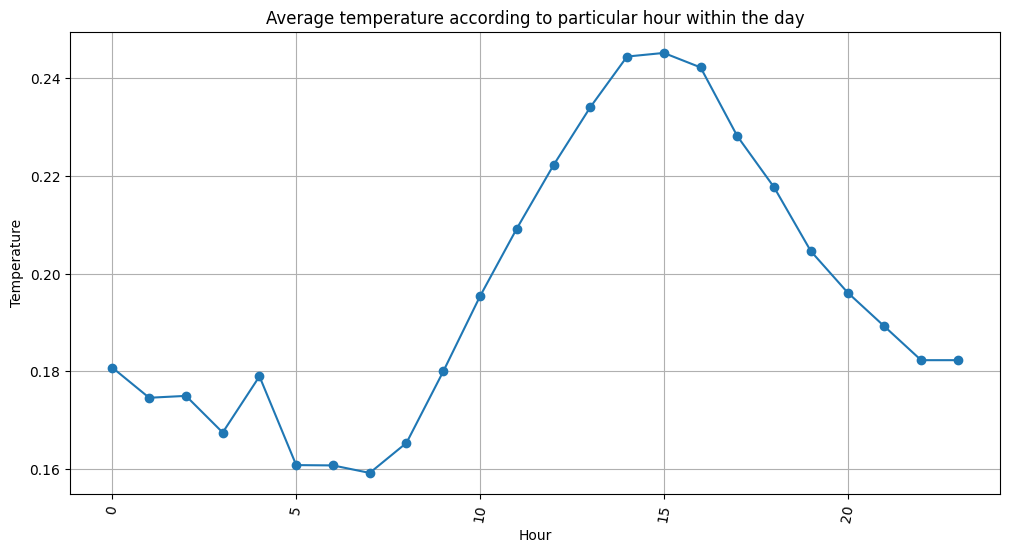

In [627]:
plt.figure(figsize=(12, 6))
plt.plot(temp_and_hour_relation['hour'],temp_and_hour_relation['temperature'],marker='o')
plt.title('Average temperature according to particular hour within the day')
plt.xticks(rotation = 80)
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.grid()
plt.show()

Data Acquisition and Data Wrangling on Dataset 2:

In [635]:
DATA_PATH_2 = r"./data/dataset_2.csv"
data_set_2 = pd.read_csv(DATA_PATH_2)

In [636]:
data_set_2.columns

Index(['Unnamed: 0', 'instant', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [638]:
# Top 10 values of the Dataset
data_set_2.head(10)

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0.0,1.0,0.2879,0.81,0.0000,3.0,13.0,16.0
1,1.0,2.0,0.2727,0.80,0.0000,8.0,32.0,40.0
2,2.0,3.0,0.2727,0.80,0.0000,5.0,27.0,32.0
3,3.0,4.0,0.2879,0.75,0.0000,3.0,10.0,13.0
4,4.0,5.0,0.2879,0.75,0.0000,0.0,1.0,1.0
5,5.0,6.0,0.2576,0.75,0.0896,0.0,1.0,1.0
6,6.0,7.0,0.2727,0.80,0.0000,2.0,0.0,2.0
7,7.0,8.0,0.2576,0.86,0.0000,1.0,2.0,3.0
8,8.0,9.0,NaN,0.75,0.0000,1.0,7.0,8.0
9,9.0,10.0,0.3485,0.76,0.0000,8.0,6.0,14.0


In [639]:
# Drop the Unnamed column which is unncessary
data_set_2.drop(columns = ['Unnamed: 0'], inplace = True)

In [640]:
# Some columns have to rename due to spelling mistakes
data_set_2 = data_set_2.rename(columns={ 
        'atemp' : 'temperature',
        'hum' : 'humidity',
        'cnt' : 'count'
        })

In [641]:
data_set_2.columns

Index(['instant', 'temperature', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [642]:
#To check if the dataset has any null values
data_set_2.isnull().sum()

instant        389
temperature    400
humidity       389
windspeed      389
casual         389
registered     389
count          389
dtype: int64

In [643]:
# To remove the null values
data_set_2.dropna(inplace = True)

In [644]:
data_set_2.isnull().sum()

instant        0
temperature    0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [386]:
# To get the unique Values of temperature
data_set_2['temperature'].unique()

array([0.2879, 0.2727, 0.2576, 0.3485, 0.3939, 0.3333, 0.4242, 0.4545,
       0.4394, 0.4091, 0.2273, 0.2121, 0.197 , 0.1364, 0.1061, 0.1212,
       0.1667, 0.1818, 0.2424, 0.1515, 0.3182, 0.0606, 0.0758, 0.0909,
       0.303 , 0.0303, 0.0455, 0.    , 0.0152])

In [645]:
# To get the unique data of humidity
data_set_2['humidity'].unique()

array([0.81, 0.8 , 0.75, 0.86, 0.76, 0.77, 0.72, 0.82, 0.88, 0.87, 0.94,
       1.  , 0.71, 0.66, 0.57, 0.46, 0.42, 0.44, 0.47, 0.5 , 0.43, 0.4 ,
       0.35, 0.3 , 0.32, 0.64, 0.69, 0.55, 0.59, 0.63, 0.68, 0.74, 0.51,
       0.56, 0.52, 0.49, 0.48, 0.37, 0.33, 0.28, 0.38, 0.36, 0.93, 0.29,
       0.39, 0.53, 0.34, 0.54, 0.41, 0.45, 0.92, 0.62, 0.58, 0.61, 0.6 ,
       0.65, 0.7 , 0.27, 0.21, 0.25, 0.26])

In [646]:
 # Hoe temperature affects the humidity and windspeed
temp_wise_hum_and_windspeed = data_set_2.groupby('temperature').agg({'humidity' : 'mean',
                                                                 'windspeed' : 'mean'}).reset_index()
temp_wise_hum_and_windspeed

,temperature,humidity,windspeed
0,0.0000,0.425000,0.358250
1,0.0152,0.460000,0.291050
2,0.0303,0.425714,0.272914
3,0.0455,0.415000,0.261200
4,0.0606,0.470000,0.249250
5,0.0758,0.491333,0.230860
6,0.0909,0.471429,0.219600
7,0.1061,0.415294,0.296765
8,0.1212,0.473171,0.282490
9,0.1364,0.481282,0.253741


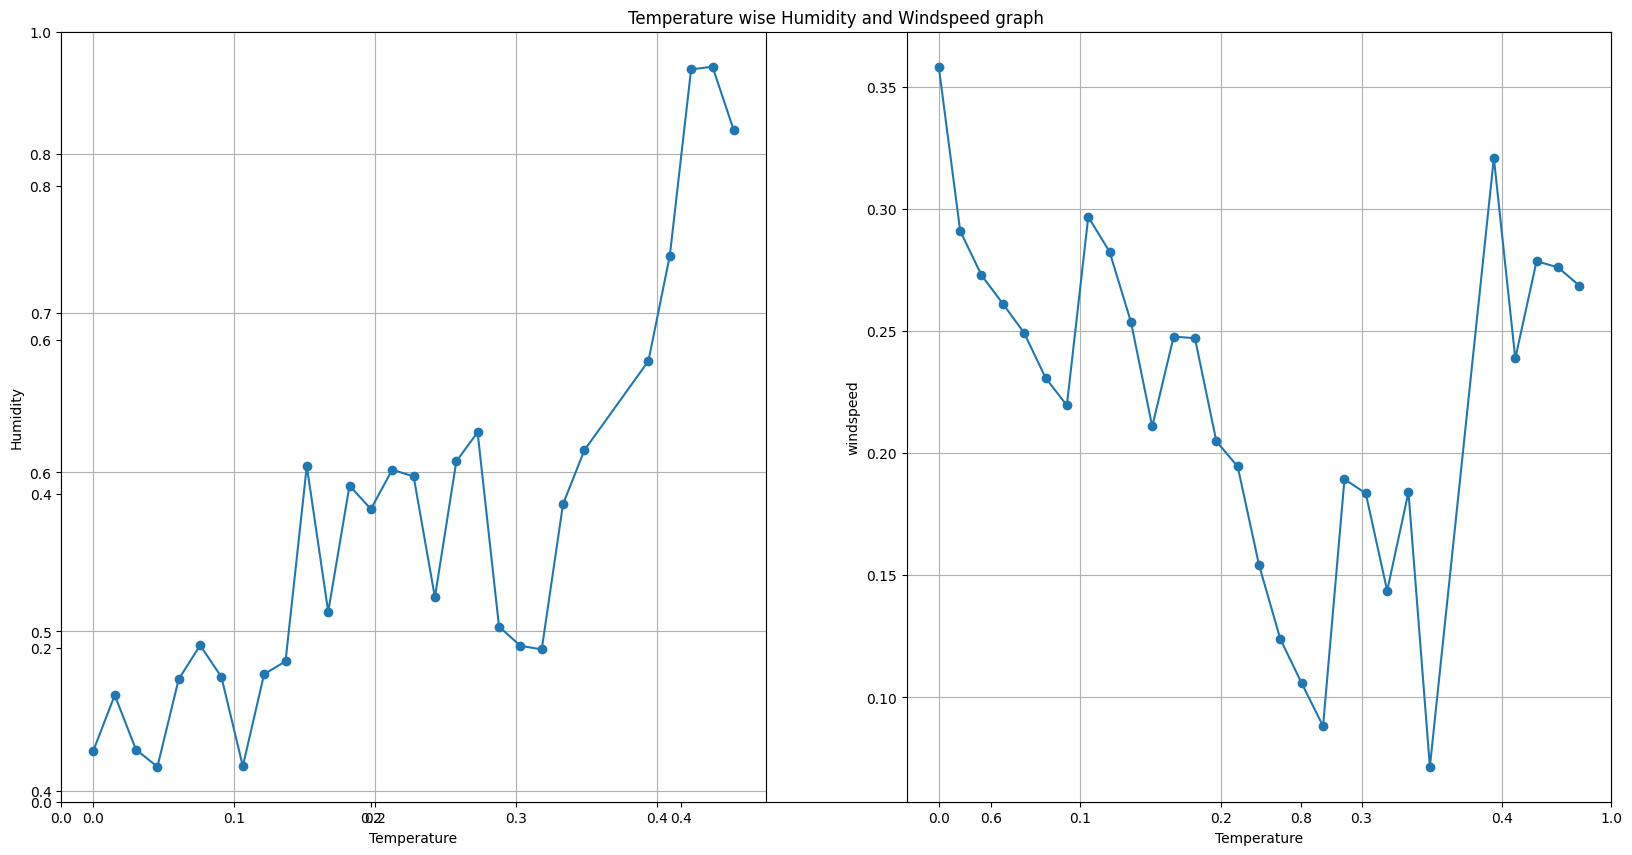

In [649]:
# Humidity and windspeed have opposite value for certain temperature 
# If Humidity increase windspeed decrese and vice a versa
plt.figure(figsize=[20,10])
plt.title('Temperature wise Humidity and Windspeed graph')
plt.subplot(1,2,1)
plt.plot(temp_wise_hum_and_windspeed['temperature'],temp_wise_hum_and_windspeed['humidity'],marker='o')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid()
plt.subplot(1,2,2)
plt.plot(temp_wise_hum_and_windspeed['temperature'],temp_wise_hum_and_windspeed['windspeed'],marker='o')
plt.xlabel('Temperature')
plt.ylabel('windspeed')
plt.grid()

In [650]:
# Registered and Non-Registered Rentals according to the temperature
temp_wise_casual_and_registered_rentals = data_set_2.groupby('temperature').agg({'casual' : 'mean',
                                                                                'registered' : 'mean',
                                                                                'count' : 'mean'}).reset_index()
temp_wise_casual_and_registered_rentals

,temperature,casual,registered,count
0,0.0000,2.000000,17.500000,19.500000
1,0.0152,0.000000,5.500000,5.500000
2,0.0303,0.714286,14.714286,15.428571
3,0.0455,0.000000,14.000000,14.000000
4,0.0606,1.100000,14.400000,15.500000
5,0.0758,1.133333,24.466667,25.600000
6,0.0909,0.857143,13.571429,14.428571
7,0.1061,3.411765,38.882353,42.294118
8,0.1212,2.414634,48.780488,51.195122
9,0.1364,4.512821,53.794872,58.307692


In [652]:
 # Average rental counts
overall_rented_count = []
for count in range(len(temp_wise_casual_and_registered_rentals['count'])):
    overall_rented_count.append(round(temp_wise_casual_and_registered_rentals['count'].mean(),2))

overall_rented_count

[np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12),
 np.float64(51.12)]

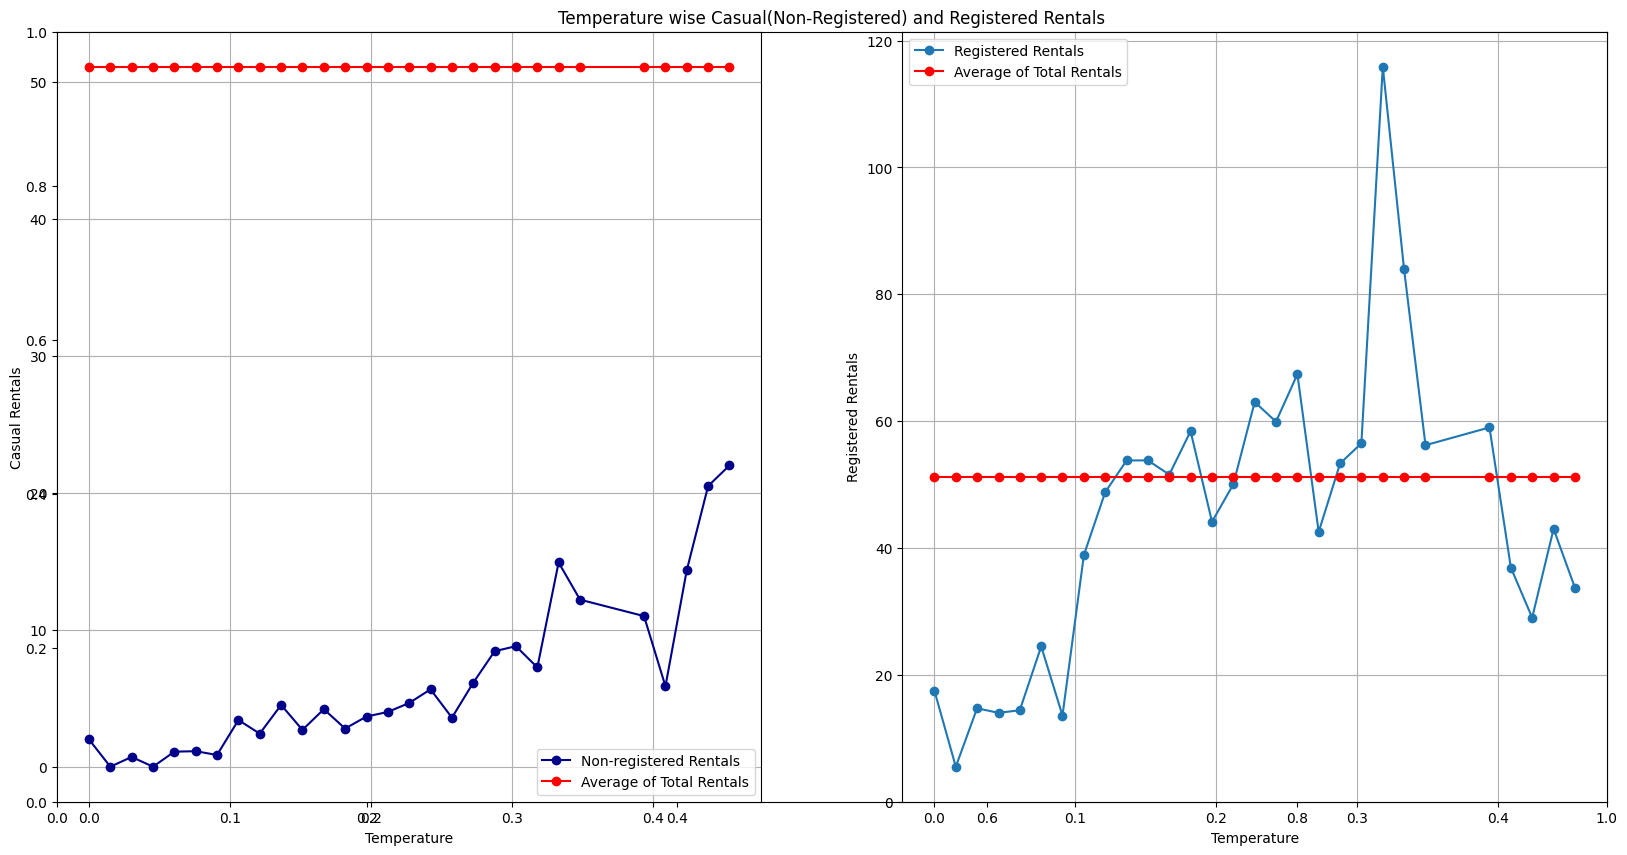

In [655]:
# Most of Registered-Rentals are move across the average line 
plt.figure(figsize=[20,10])
plt.title('Temperature wise Casual(Non-Registered) and Registered Rentals')
plt.subplot(1,2,1)
plt.plot(temp_wise_casual_and_registered_rentals['temperature'],temp_wise_casual_and_registered_rentals['casual'],marker = 'o', color = 'darkblue', label = 'Non-registered Rentals')
plt.plot(temp_wise_casual_and_registered_rentals['temperature'],overall_rented_count,marker = 'o', color = 'red', label = 'Average of Total Rentals')
plt.xlabel('Temperature')
plt.ylabel('Casual Rentals')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(temp_wise_casual_and_registered_rentals['temperature'],temp_wise_casual_and_registered_rentals['registered'],marker='o',label = 'Registered Rentals')
plt.plot(temp_wise_casual_and_registered_rentals['temperature'],overall_rented_count,marker = 'o', color = 'red', label = 'Average of Total Rentals')
plt.xlabel('Temperature')
plt.ylabel('Registered Rentals')
plt.legend()
plt.grid()

In [393]:
data_set_1.columns

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature'],
      dtype='object')

In [394]:
data_set_2.columns

Index(['instant', 'temperature', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

Merge Data_Set_1 and Data_Set_2:

In [695]:
# Merging the Two Data_sets which has different columns
merge_data_set = pd.merge(data_set_1, data_set_2, on = 'instant', how = 'outer')

In [696]:
merge_data_set.columns

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature_x', 'temperature_y', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [697]:
merge_data_set

,instant,date,season,hour,holiday,weekday,weather,temperature_x,temperature_y,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,False,6,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,01-01-2011,1,1,False,6,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3,01-01-2011,1,2,False,6,1,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4,01-01-2011,1,3,False,6,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5,01-01-2011,1,4,False,6,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,11,False,5,3,0.18,0.2121,0.93,0.1045,0.0,30.0,30.0
606,607,28-01-2011,1,12,False,5,3,0.18,0.2121,0.93,0.1045,1.0,28.0,29.0
607,608,28-01-2011,1,13,False,5,3,0.18,0.2121,0.93,0.1045,0.0,31.0,31.0
608,609,28-01-2011,1,14,False,5,3,0.22,0.2727,0.80,0.0000,2.0,36.0,38.0


In [698]:
# To find the Dimension of the Merge Data Set
merge_data_set.shape

(610, 14)

In [699]:
print(merge_data_set['date'].unique())

['01-01-2011' '02-01-2011' '03-01-2011' '04-01-2011' '05-01-2011'
 '06-01-2011' '07-01-2011' '08-01-2011' '09-01-2011' '10-01-2011'
 '11-01-2011' '12-01-2011' '13-01-2011' '14-01-2011' '15-01-2011'
 '16-01-2011' '17-01-2011' '18-01-2011' '19-01-2011' '20-01-2011'
 '21-01-2011' '22-01-2011' '23-01-2011' '24-01-2011' '25-01-2011'
 '26-01-2011' '27-01-2011' '28-01-2011']


In [700]:
# Convert to datetime with explicit format
merge_data_set['date'] = pd.to_datetime(merge_data_set['date'], format='%d-%m-%Y', errors='coerce')

# Check for NaN values caused by the conversion
invalid_dates = merge_data_set[merge_data_set['date'].isna()]
print("Invalid Dates:", invalid_dates)

# Format the dates to ISO 8601 (YYYY-MM-DD) if conversion was successful
merge_data_set['date'] = merge_data_set['date'].dt.strftime('%Y-%m-%d')

# Print unique values after conversion
print("Converted Dates:", merge_data_set['date'].unique())

Invalid Dates: Empty DataFrame
Columns: [instant, date, season, hour, holiday, weekday, weather, temperature_x, temperature_y, humidity, windspeed, casual, registered, count]
Index: []
Converted Dates: ['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28']


In [702]:
merge_data_set['temperature'] = merge_data_set[['temperature_x','temperature_y']].mean(axis=1)

In [703]:
merge_data_set.columns

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature_x', 'temperature_y', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'temperature'],
      dtype='object')

In [704]:
merge_data_set.drop(['temperature_x','temperature_y'],axis = 1,inplace = True)

In [705]:
merge_data_set.columns

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'humidity', 'windspeed', 'casual', 'registered', 'count',
       'temperature'],
      dtype='object')

In [706]:
# To shift the temperature column
columns = ['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather', 
           'humidity', 'windspeed', 'casual', 'registered', 'count', 'temperature']

columns.remove('temperature')
columns.insert(columns.index('weather') + 1, 'temperature')

# Reorder the DataFrame using the updated column list
merge_data_set = merge_data_set[columns]

In [707]:
merge_data_set.columns

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [708]:
merge_data_set.isnull().sum()

instant         0
date            0
season          0
hour            0
holiday         0
weekday         0
weather         0
temperature     0
humidity       11
windspeed      11
casual         11
registered     11
count          11
dtype: int64

In [709]:
# To remove null values by predicting them based on surrounding data points.
merge_data_set.interpolate(method='linear', inplace=True)  # Linear interpolation

C:\Users\darsh\AppData\Local\Temp\ipykernel_25512\3415299296.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  merge_data_set.interpolate(method='linear', inplace=True)  # Linear interpolation


In [710]:
# It removes further warning and remove null values with appropriate surrounding datapoints.
# Interpolate only numeric columns
numeric_data = merge_data_set.select_dtypes(include=['number']).interpolate(method='linear')

# Update the original DataFrame with the interpolated values
merge_data_set.update(numeric_data)

In [711]:
merge_data_set.isnull().sum()

instant        0
date           0
season         0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [712]:
merge_data_set.dtypes

instant          int64
date            object
season           int64
hour             int64
holiday           bool
weekday          int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
casual         float64
registered     float64
count          float64
dtype: object

In [713]:
merge_data_set.shape

(610, 13)

In [714]:
# To see the Data_set in the Excel
merge_data_set.to_clipboard()

In [715]:
# Average Temperature,Humidity,Windspeed on Month of January
average_temp = merge_data_set['temperature'].mean()
average_Humidity =  merge_data_set['humidity'].mean()
average_windspped = merge_data_set['windspeed'].mean()
print(f"Average Temperature on month of January is: {round(average_temp,3)}")
print(f"Average Humidity on month of January is: {round(average_Humidity,3)}")
print(f"Average Windspeed on month of January is: {round(average_windspped,3)}")

Average Temperature on month of January is: 0.199
Average Humidity on month of January is: 0.563
Average Windspeed on month of January is: 0.205


In [716]:
most_casual_rentals = merge_data_set.groupby('date')['casual'].agg(lambda x: list(x.mode())).reset_index()
print(most_casual_rentals)

          date           casual
0   2011-01-01            [3.0]
1   2011-01-02            [0.0]
2   2011-01-03            [0.0]
3   2011-01-04            [0.0]
4   2011-01-05            [0.0]
5   2011-01-06            [0.0]
6   2011-01-07            [9.0]
7   2011-01-08            [0.0]
8   2011-01-09            [0.0]
9   2011-01-10            [0.0]
10  2011-01-11            [0.0]
11  2011-01-12            [0.0]
12  2011-01-13            [0.0]
13  2011-01-14            [0.0]
14  2011-01-15       [0.0, 1.0]
15  2011-01-16            [0.0]
16  2011-01-17            [0.0]
17  2011-01-18            [0.0]
18  2011-01-19            [1.0]
19  2011-01-20            [0.0]
20  2011-01-21            [0.0]
21  2011-01-22            [0.0]
22  2011-01-23            [5.0]
23  2011-01-24            [0.0]
24  2011-01-25            [0.0]
25  2011-01-26            [0.0]
26  2011-01-27  [0.0, 2.0, 3.0]
27  2011-01-28            [0.0]


In [717]:
# Holiday Counts
merge_data_set['holiday'].value_counts()

holiday
False    586
True      24
Name: count, dtype: int64

In [718]:
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
merge_data_set['weather'].value_counts()

weather
1    368
2    194
3     47
4      1
Name: count, dtype: int64

In [719]:
humidity_and_windspeed_values_on_per_hour = merge_data_set.groupby('hour').agg({'humidity' : 'mean',
                                                                          'windspeed' : 'mean'}).reset_index()
humidity_and_windspeed_values_on_per_hour

,hour,humidity,windspeed
0,0,0.608846,0.170496
1,1,0.619808,0.173944
2,2,0.643333,0.164179
3,3,0.596250,0.179106
4,4,0.613750,0.157092
5,5,0.626250,0.164192
6,6,0.633846,0.162465
7,7,0.634615,0.150400
8,8,0.616538,0.181412
9,9,0.593462,0.218723


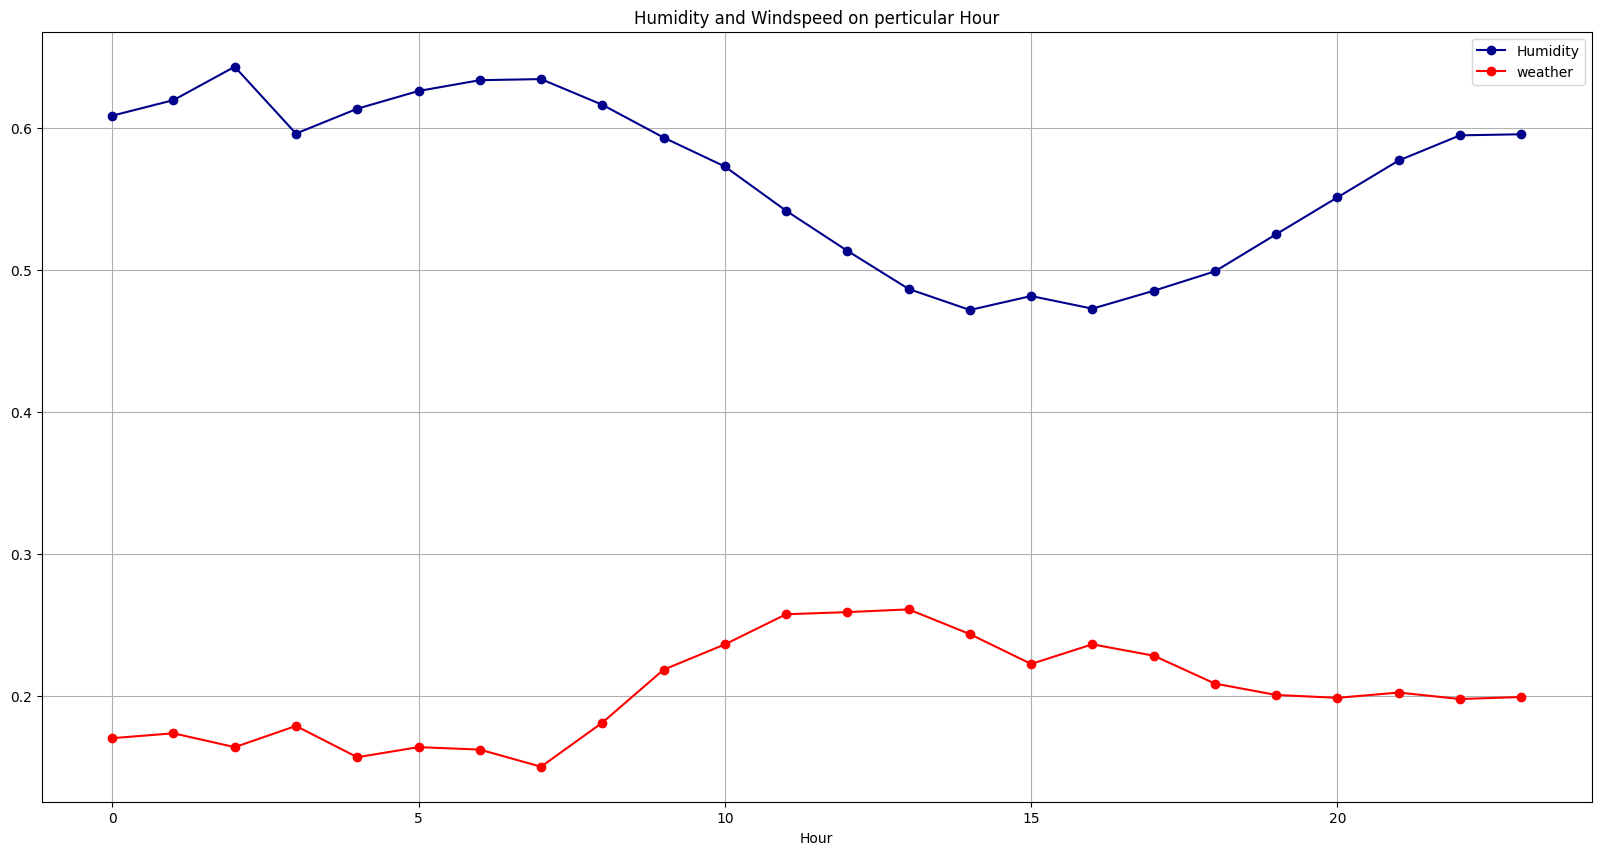

In [720]:
plt.figure(figsize=[20,10])
plt.title('Humidity and Windspeed on perticular Hour')
plt.plot(humidity_and_windspeed_values_on_per_hour['hour'],humidity_and_windspeed_values_on_per_hour['humidity'],marker = 'o', color = 'darkblue',label =  'Humidity')
plt.plot(humidity_and_windspeed_values_on_per_hour['hour'],humidity_and_windspeed_values_on_per_hour['windspeed'],marker = 'o', color = 'red', label = 'weather')
plt.xlabel('Hour')
plt.ylabel('')
plt.legend()
plt.grid()
plt.show()

In [722]:
# To fill Season Data with its actual value for its proper understanding
merge_data_set['season'] = merge_data_set['season'].map({1: 'spring',
                                                          2: 'summer',
                                                          3: 'fall',
                                                          4: 'winter'})

In [723]:
merge_data_set['season'].unique()

array(['spring'], dtype=object)

Data Acquisition and Wrangling on Dataset 3.

In [724]:
DATA_PATH_3 = r"./data/dataset_3.csv"
data_set_3 = pd.read_csv(DATA_PATH_3)

In [725]:
data_set_3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [726]:
# yr and the mnth are the unncessary columns in the dataset.
data_set_3.drop(columns = ['yr','mnth'],inplace = True)

In [727]:
data_set_3.columns

Index(['instant', 'dteday', 'season', 'hr', 'holiday', 'weekday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [728]:
# Some columns have to rename due to spelling mistakes
data_set_3 = data_set_3.rename(columns={ 
                                    'dteday' : 'date',
                                    'hr' : 'hour',
                                    'weathersit' : 'weather',
                                    'temp' : 'temperature_x',
                                    'atemp' : 'temperature_y',
                                    'hum' : 'humidity',
                                    'cnt' : 'count'
                                })

In [729]:
data_set_3.columns

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature_x', 'temperature_y', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [730]:
# To fill Season Data with its actual value for its proper understanding
data_set_3['season'] = data_set_3['season'].map({1: 'spring',
                                                2: 'summer',
                                                3: 'fall',
                                                4: 'winter'})

In [531]:
data_set_3

,instant,date,season,hour,holiday,weekday,weather,temperature_x,temperature_y,humidity,windspeed,casual,registered,count
0,620,29-01-2011,spring,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,spring,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,spring,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,spring,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,spring,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,spring,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,spring,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,spring,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,spring,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [732]:
data_set_3['temperature'] = data_set_3[['temperature_x','temperature_y']].mean(axis=1)
data_set_3 = data_set_3.drop(['temperature_x','temperature_y'],axis = 1,inplace = True)

In [733]:
columns = ['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather', 
           'humidity', 'windspeed', 'casual', 'registered', 'count', 'temperature']

columns.remove('temperature')
columns.insert(columns.index('weather') + 1, 'temperature')

# Reorder the DataFrame using the updated column list
data_set_3 = data_set_3[columns]

In [734]:
# Convert to datetime with explicit format
data_set_3['date'] = pd.to_datetime(data_set_3['date'], format='%d-%m-%Y', errors='coerce')

# Verify the conversion and format to ISO 8601 (YYYY-MM-DD)
data_set_3['date'] = data_set_3['date'].dt.strftime('%Y-%m-%d')

In [735]:
invalid_dates = merge_data_set[pd.to_datetime(merge_data_set['date'], errors='coerce').isna()]
print(invalid_dates)

Empty DataFrame
Columns: [instant, date, season, hour, holiday, weekday, weather, temperature, humidity, windspeed, casual, registered, count]
Index: []


In [736]:
data_set_3.isnull().sum()

instant        0
date           0
season         0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [539]:
data_set_3['holiday'].value_counts()  
# There is no Holiday on Month of February

holiday
False    390
Name: count, dtype: int64

In [737]:
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

data_set_3['weather'].value_counts()

weather
1    238
2    115
3     37
Name: count, dtype: int64

In [738]:
humidity_and_windspeed_on_per_hour_for_data_set_3 = data_set_3.groupby('hour').agg({'humidity' : 'mean',
                                                                           'windspeed' : 'mean'}).reset_index()
humidity_and_windspeed_on_per_hour_for_data_set_3

,hour,humidity,windspeed
0,0,0.637059,0.171212
1,1,0.657059,0.161547
2,2,0.677059,0.137847
3,3,0.695333,0.113433
4,4,0.750833,0.169167
5,5,0.707333,0.150267
6,6,0.696875,0.149256
7,7,0.685882,0.149265
8,8,0.716250,0.166981
9,9,0.673750,0.168850


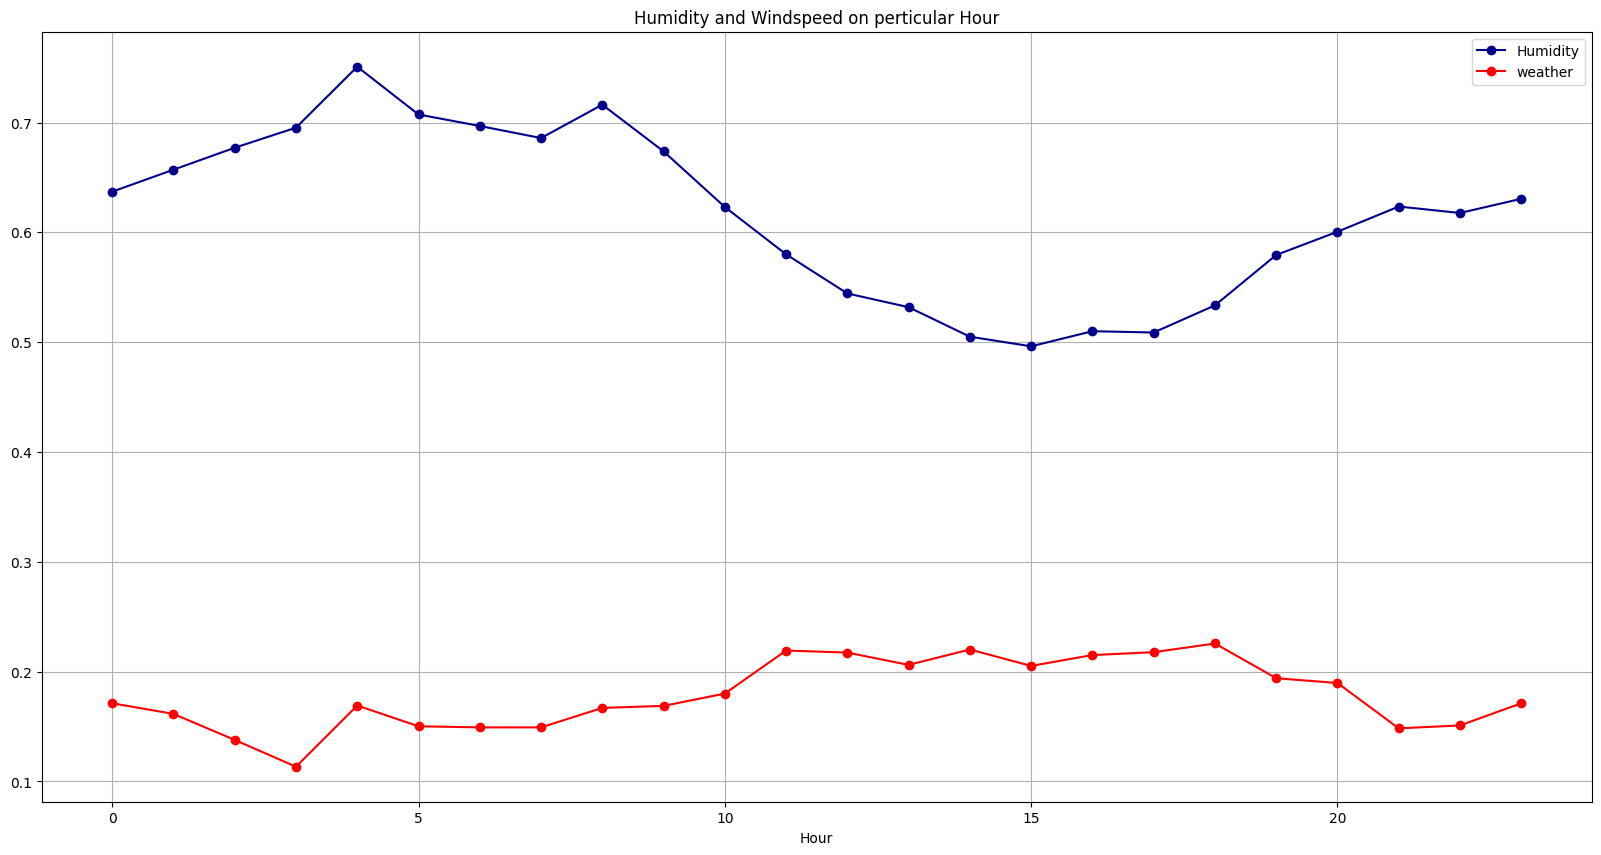

In [739]:
plt.figure(figsize=[20,10])
plt.title('Humidity and Windspeed on perticular Hour')
plt.plot(humidity_and_windspeed_on_per_hour_for_data_set_3['hour'],humidity_and_windspeed_on_per_hour_for_data_set_3['humidity'],marker = 'o', color = 'darkblue',label =  'Humidity')
plt.plot(humidity_and_windspeed_on_per_hour_for_data_set_3['hour'],humidity_and_windspeed_on_per_hour_for_data_set_3['windspeed'],marker = 'o', color = 'red', label = 'weather')
plt.xlabel('Hour')
plt.ylabel('')
plt.legend()
plt.grid()
plt.show()

In [740]:
temp_wise_hum_and_windspeed_on_data_set_3 = data_set_3.groupby('temperature').agg({'humidity' : 'mean',
                                                                 'windspeed' : 'mean'}).reset_index()
temp_wise_hum_and_windspeed_on_data_set_3

,temperature,humidity,windspeed
0,0.06790,0.45000,0.134300
1,0.07790,0.38000,0.283600
2,0.08305,0.47000,0.104500
3,0.08790,0.45000,0.368167
4,0.10060,0.63000,0.089600
...,...,...,...
87,0.35425,0.57000,0.134300
88,0.36180,0.57000,0.089600
89,0.38695,0.52500,0.313450
90,0.40455,0.33375,0.330225


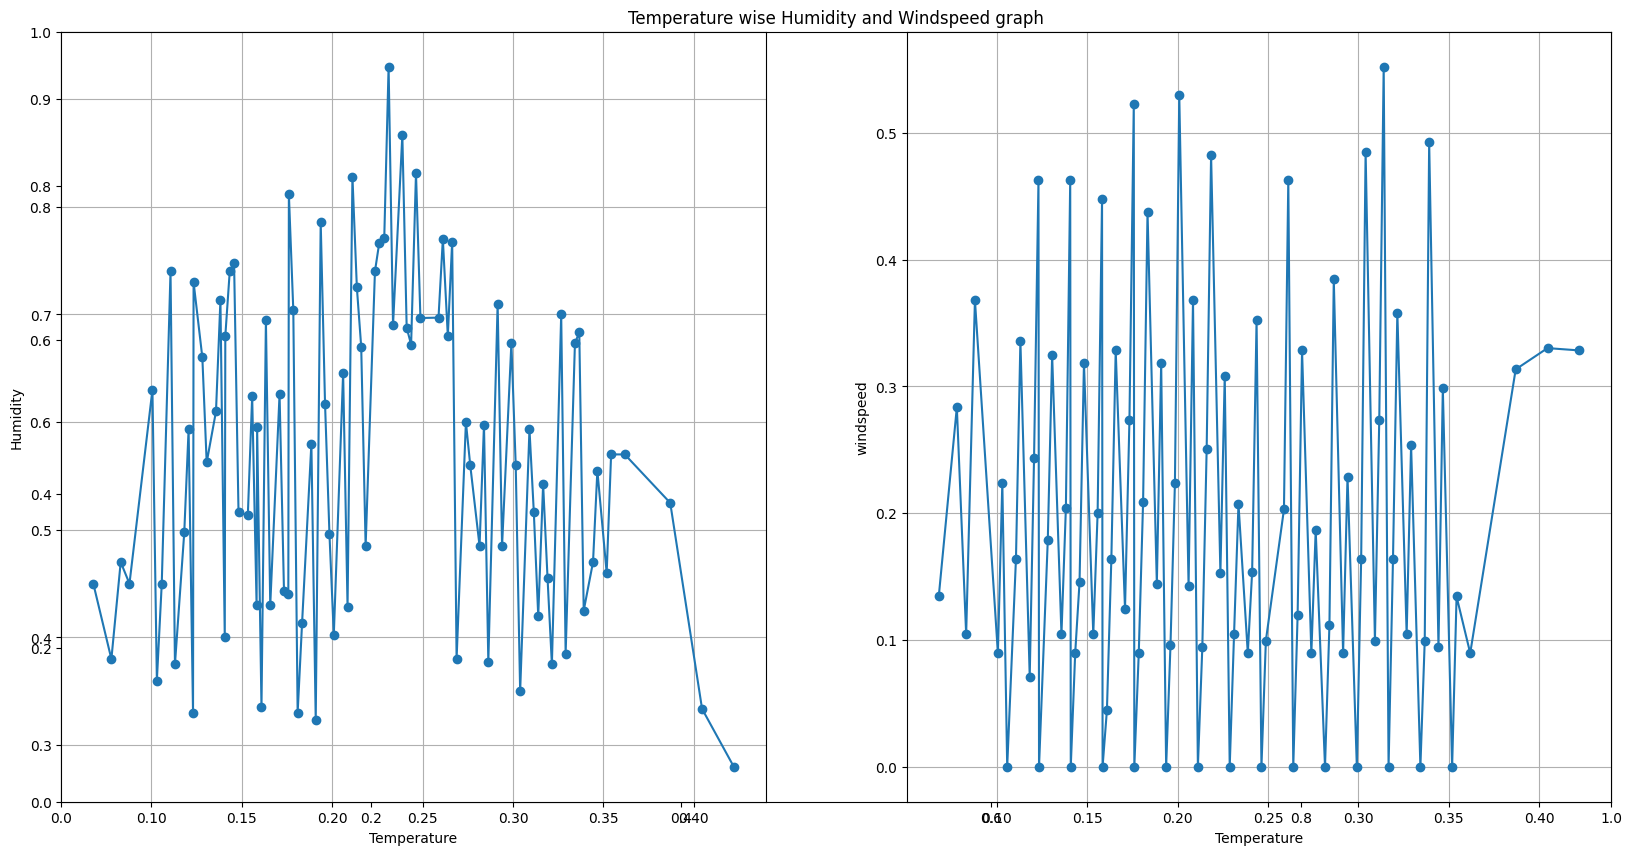

In [741]:
plt.figure(figsize=[20,10])
plt.title('Temperature wise Humidity and Windspeed graph')
plt.subplot(1,2,1)
plt.plot(temp_wise_hum_and_windspeed_on_data_set_3['temperature'],temp_wise_hum_and_windspeed_on_data_set_3['humidity'],marker='o')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid()
plt.subplot(1,2,2)
plt.plot(temp_wise_hum_and_windspeed_on_data_set_3['temperature'],temp_wise_hum_and_windspeed_on_data_set_3['windspeed'],marker='o')
plt.xlabel('Temperature')
plt.ylabel('windspeed')
plt.grid()

In [743]:
temp_wise_casual_and_registered_rentals_on_data_set_3 = data_set_3.groupby('temperature').agg({'casual' : 'mean',
                                                                                                'registered' : 'mean',
                                                                                                'count' : 'mean'}).reset_index()
temp_wise_casual_and_registered_rentals_on_data_set_3

,temperature,casual,registered,count
0,0.06790,0.000000,2.000000,2.000000
1,0.07790,1.000000,2.000000,3.000000
2,0.08305,2.000000,51.000000,53.000000
3,0.08790,1.666667,96.333333,98.000000
4,0.10060,0.000000,4.000000,4.000000
...,...,...,...,...
87,0.35425,16.000000,98.000000,114.000000
88,0.36180,9.000000,53.000000,62.000000
89,0.38695,13.666667,46.500000,60.166667
90,0.40455,18.500000,61.875000,80.375000


In [744]:
overall_rented_count_of_data_set_3 = []
for count in range(len(temp_wise_casual_and_registered_rentals_on_data_set_3['count'])):
    overall_rented_count_of_data_set_3.append(round(temp_wise_casual_and_registered_rentals_on_data_set_3['count'].mean(),2))

overall_rented_count_of_data_set_3

[np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(67.8),
 np.float64(

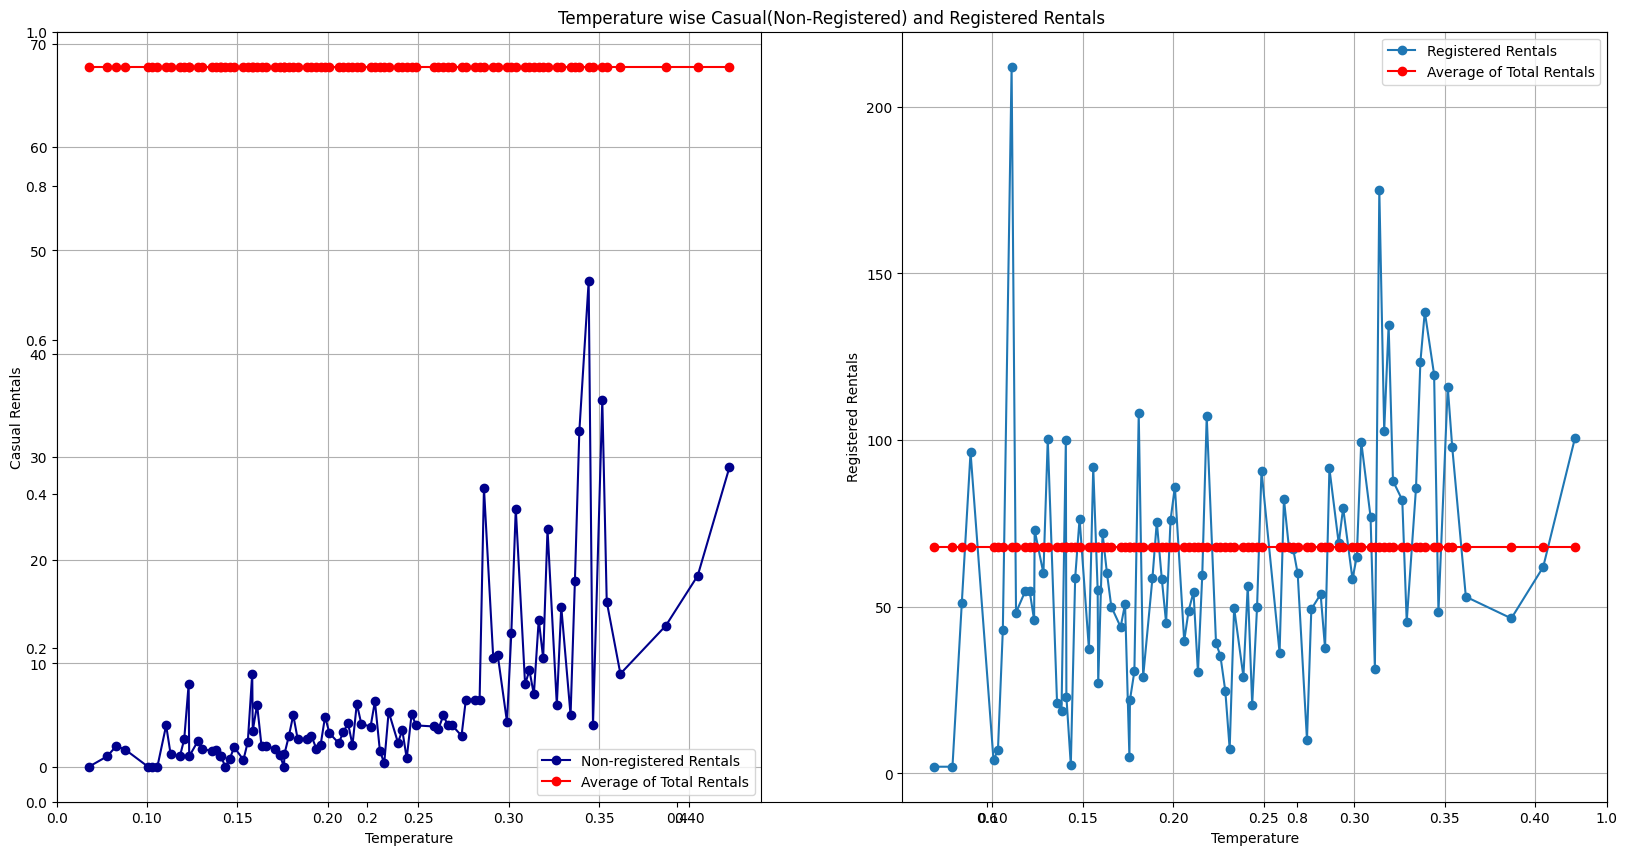

In [745]:
plt.figure(figsize=[20,10])
plt.title('Temperature wise Casual(Non-Registered) and Registered Rentals')
plt.subplot(1,2,1)
plt.plot(temp_wise_casual_and_registered_rentals_on_data_set_3['temperature'],temp_wise_casual_and_registered_rentals_on_data_set_3['casual'],marker = 'o', color = 'darkblue', label = 'Non-registered Rentals')
plt.plot(temp_wise_casual_and_registered_rentals_on_data_set_3['temperature'],overall_rented_count_of_data_set_3,marker = 'o', color = 'red', label = 'Average of Total Rentals')
plt.xlabel('Temperature')
plt.ylabel('Casual Rentals')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(temp_wise_casual_and_registered_rentals_on_data_set_3['temperature'],temp_wise_casual_and_registered_rentals_on_data_set_3['registered'],marker='o',label = 'Registered Rentals')
plt.plot(temp_wise_casual_and_registered_rentals_on_data_set_3['temperature'],overall_rented_count_of_data_set_3,marker = 'o', color = 'red', label = 'Average of Total Rentals')
plt.xlabel('Temperature')
plt.ylabel('Registered Rentals')
plt.legend()
plt.grid()

In [746]:
date_and_temp_relation_on_data_set_3 = data_set_3.groupby('date').agg({'temperature' : 'mean'}).reset_index()
date_and_temp_relation_on_data_set_3

,date,temperature
0,2011-01-28,0.234925
1,2011-01-29,0.204324
2,2011-01-30,0.233422
3,2011-01-31,0.183542
4,2011-02-01,0.213352
5,2011-02-02,0.257208
6,2011-02-03,0.182417
7,2011-02-04,0.219946
8,2011-02-05,0.238196
9,2011-02-06,0.288752


In [747]:
temp_and_hour_relation_on_data_set_3 = data_set_1.groupby('hour').agg({'temperature' : 'mean'}).reset_index()
temp_and_hour_relation_on_data_set_3

,hour,temperature
0,0,0.180769
1,1,0.174615
2,2,0.175000
3,3,0.167500
4,4,0.179000
5,5,0.160833
6,6,0.160769
7,7,0.159231
8,8,0.165385
9,9,0.180000


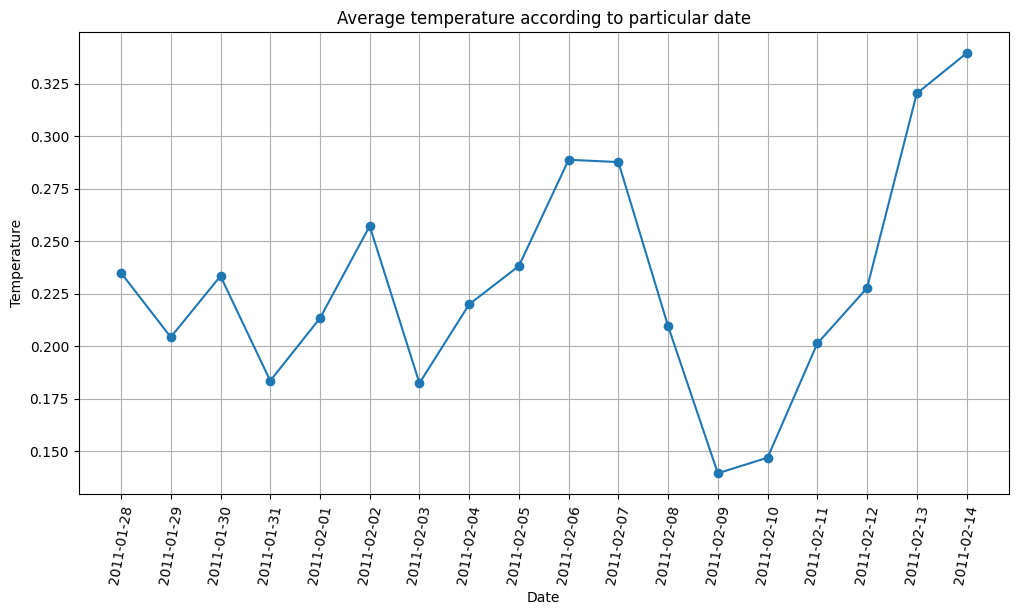

In [749]:
plt.figure(figsize=(12, 6))
plt.plot(date_and_temp_relation_on_data_set_3['date'],date_and_temp_relation_on_data_set_3['temperature'],marker='o')
plt.title('Average temperature according to particular date')
plt.xticks(rotation = 80)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid()
plt.show()

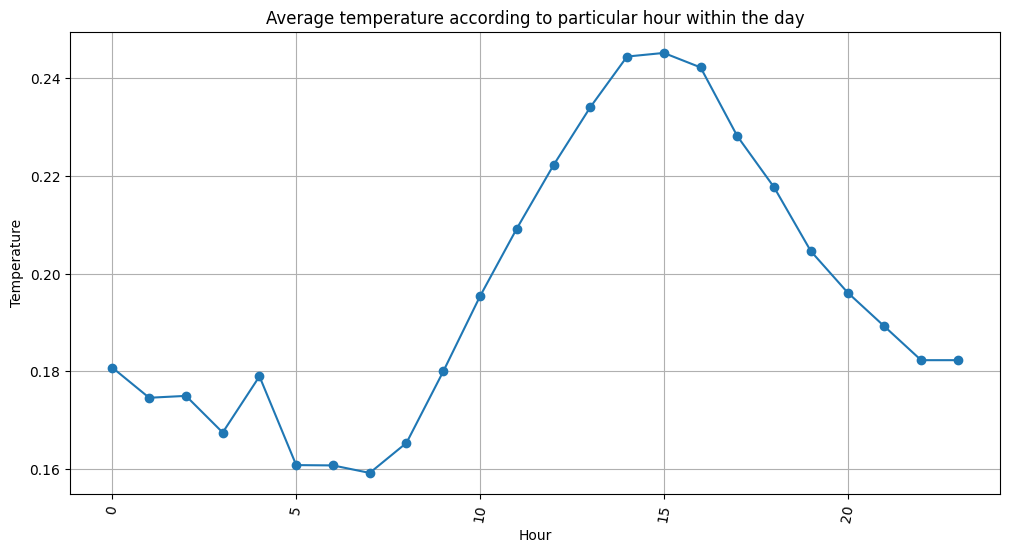

In [750]:
plt.figure(figsize=(12, 6))
plt.plot(temp_and_hour_relation['hour'],temp_and_hour_relation['temperature'],marker='o')
plt.title('Average temperature according to particular hour within the day')
plt.xticks(rotation = 80)
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.grid()
plt.show()

Concatenate Data_set_3 and the Merge_Data_set(Data_set_1 + Data_Set_2) 

In [751]:
merge_data_set

,instant,date,season,hour,holiday,weekday,weather,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,False,6,1,0.26395,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,spring,1,False,6,1,0.24635,0.80,0.0000,8.0,32.0,40.0
2,3,2011-01-01,spring,2,False,6,1,0.24635,0.80,0.0000,5.0,27.0,32.0
3,4,2011-01-01,spring,3,False,6,1,0.26395,0.75,0.0000,3.0,10.0,13.0
4,5,2011-01-01,spring,4,False,6,1,0.26395,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,2011-01-28,spring,11,False,5,3,0.19605,0.93,0.1045,0.0,30.0,30.0
606,607,2011-01-28,spring,12,False,5,3,0.19605,0.93,0.1045,1.0,28.0,29.0
607,608,2011-01-28,spring,13,False,5,3,0.19605,0.93,0.1045,0.0,31.0,31.0
608,609,2011-01-28,spring,14,False,5,3,0.24635,0.80,0.0000,2.0,36.0,38.0


In [752]:
data_set_3

,instant,date,season,hour,holiday,weekday,weather,temperature,humidity,windspeed,casual,registered,count
0,620,2011-01-29,spring,1,False,6,1,0.22365,0.64,0.1940,0,20,20
1,621,2011-01-29,spring,2,False,6,1,0.22365,0.64,0.1642,0,15,15
2,622,2011-01-29,spring,3,False,6,1,0.20605,0.64,0.1343,3,5,8
3,623,2011-01-29,spring,4,False,6,1,0.17090,0.69,0.1045,1,2,3
4,624,2011-01-29,spring,6,False,6,1,0.17090,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,2011-01-28,spring,20,False,5,2,0.23365,0.70,0.1940,1,61,62
386,616,2011-01-28,spring,21,False,5,2,0.22365,0.75,0.1343,1,57,58
387,617,2011-01-28,spring,22,False,5,1,0.22605,0.65,0.3582,0,26,26
388,618,2011-01-28,spring,23,False,5,1,0.23365,0.60,0.2239,1,22,23


In [753]:
print(merge_data_set.columns)
print(data_set_3.columns)

Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')
Index(['instant', 'date', 'season', 'hour', 'holiday', 'weekday', 'weather',
       'temperature', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')


In [754]:
print(merge_data_set.dtypes)
print(data_set_3.dtypes)

instant          int64
date            object
season          object
hour             int64
holiday           bool
weekday          int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
casual         float64
registered     float64
count          float64
dtype: object
instant          int64
date            object
season          object
hour             int64
holiday           bool
weekday          int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object


In [755]:
# Convert to int64 if decimal values are not needed
columns_to_convert = ['casual', 'registered', 'count']

merge_data_set[columns_to_convert] = merge_data_set[columns_to_convert].astype('int64')
data_set_3[columns_to_convert] = data_set_3[columns_to_convert].astype('int64')

In [756]:
print(merge_data_set.dtypes)
print(data_set_3.dtypes)

instant          int64
date            object
season          object
hour             int64
holiday           bool
weekday          int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object
instant          int64
date            object
season          object
hour             int64
holiday           bool
weekday          int64
weather          int64
temperature    float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object


In [757]:
final_data_set = pd.concat([merge_data_set, data_set_3], ignore_index=True)

In [758]:
final_data_set

,instant,date,season,hour,holiday,weekday,weather,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,False,6,1,0.26395,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,1,False,6,1,0.24635,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,2,False,6,1,0.24635,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,3,False,6,1,0.26395,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,4,False,6,1,0.26395,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,615,2011-01-28,spring,20,False,5,2,0.23365,0.70,0.1940,1,61,62
996,616,2011-01-28,spring,21,False,5,2,0.22365,0.75,0.1343,1,57,58
997,617,2011-01-28,spring,22,False,5,1,0.22605,0.65,0.3582,0,26,26
998,618,2011-01-28,spring,23,False,5,1,0.23365,0.60,0.2239,1,22,23


In [759]:
# To set the values in ascending order by instant
final_data_set = final_data_set.sort_values(by='instant', ascending=True).reset_index(drop=True)

In [760]:
final_data_set

,instant,date,season,hour,holiday,weekday,weather,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,False,6,1,0.26395,0.81,0.0000,3,13,16
1,2,2011-01-01,spring,1,False,6,1,0.24635,0.80,0.0000,8,32,40
2,3,2011-01-01,spring,2,False,6,1,0.24635,0.80,0.0000,5,27,32
3,4,2011-01-01,spring,3,False,6,1,0.26395,0.75,0.0000,3,10,13
4,5,2011-01-01,spring,4,False,6,1,0.26395,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2011-02-14,spring,3,False,1,1,0.32910,0.46,0.2239,1,1,2
996,997,2011-02-14,spring,4,False,1,1,0.31150,0.53,0.2836,0,2,2
997,998,2011-02-14,spring,5,False,1,1,0.31150,0.53,0.2836,0,3,3
998,999,2011-02-14,spring,6,False,1,1,0.32150,0.46,0.2985,1,25,26


In [761]:
final_data_set.isnull().sum()

instant        0
date           0
season         0
hour           0
holiday        0
weekday        0
weather        0
temperature    0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [762]:
def get_continious_categorical_data_columns(data):
    contnious_data_list = []
    categorical_data_list = []
    for col in data.columns:
        print(f"Col : {col} | Datatype : {data[col].dtypes}")
        if data[col].dtypes == "object":
            categorical_data_list.append(col)
        else:
            contnious_data_list.append(col)
    return categorical_data_list, contnious_data_list

categorical_data_list, contnious_data_list  = get_continious_categorical_data_columns(final_data_set)

Col : instant | Datatype : int64
Col : date | Datatype : object
Col : season | Datatype : object
Col : hour | Datatype : int64
Col : holiday | Datatype : bool
Col : weekday | Datatype : int64
Col : weather | Datatype : int64
Col : temperature | Datatype : float64
Col : humidity | Datatype : float64
Col : windspeed | Datatype : float64
Col : casual | Datatype : int64
Col : registered | Datatype : int64
Col : count | Datatype : int64


In [763]:
final_data_set[contnious_data_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      1000 non-null   int64  
 1   hour         1000 non-null   int64  
 2   holiday      1000 non-null   bool   
 3   weekday      1000 non-null   int64  
 4   weather      1000 non-null   int64  
 5   temperature  1000 non-null   float64
 6   humidity     1000 non-null   float64
 7   windspeed    1000 non-null   float64
 8   casual       1000 non-null   int64  
 9   registered   1000 non-null   int64  
 10  count        1000 non-null   int64  
dtypes: bool(1), float64(3), int64(7)
memory usage: 79.2 KB


In [764]:
final_data_set[contnious_data_list].skew()

instant        0.000000
hour          -0.063524
holiday        6.229578
weekday        0.021925
weather        1.044098
temperature    0.558808
humidity       0.434306
windspeed      0.433437
casual         3.393217
registered     1.295045
count          1.134975
dtype: float64

In [765]:
final_data_set[contnious_data_list].skew().index

Index(['instant', 'hour', 'holiday', 'weekday', 'weather', 'temperature',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [766]:
final_data_set[contnious_data_list].skew().values

array([ 0.        , -0.06352363,  6.22957791,  0.021925  ,  1.0440981 ,
        0.55880784,  0.43430643,  0.43343684,  3.39321748,  1.29504541,
        1.13497518])

In [767]:
for col in contnious_data_list:
    print(f"{col} - Data Type: {final_data_set[col].dtype}, NaNs: {final_data_set[col].isna().sum()}")

instant - Data Type: int64, NaNs: 0
hour - Data Type: int64, NaNs: 0
holiday - Data Type: bool, NaNs: 0
weekday - Data Type: int64, NaNs: 0
weather - Data Type: int64, NaNs: 0
temperature - Data Type: float64, NaNs: 0
humidity - Data Type: float64, NaNs: 0
windspeed - Data Type: float64, NaNs: 0
casual - Data Type: int64, NaNs: 0
registered - Data Type: int64, NaNs: 0
count - Data Type: int64, NaNs: 0


In [768]:
final_data_set[contnious_data_list] = final_data_set[contnious_data_list].apply(pd.to_numeric, errors='coerce')

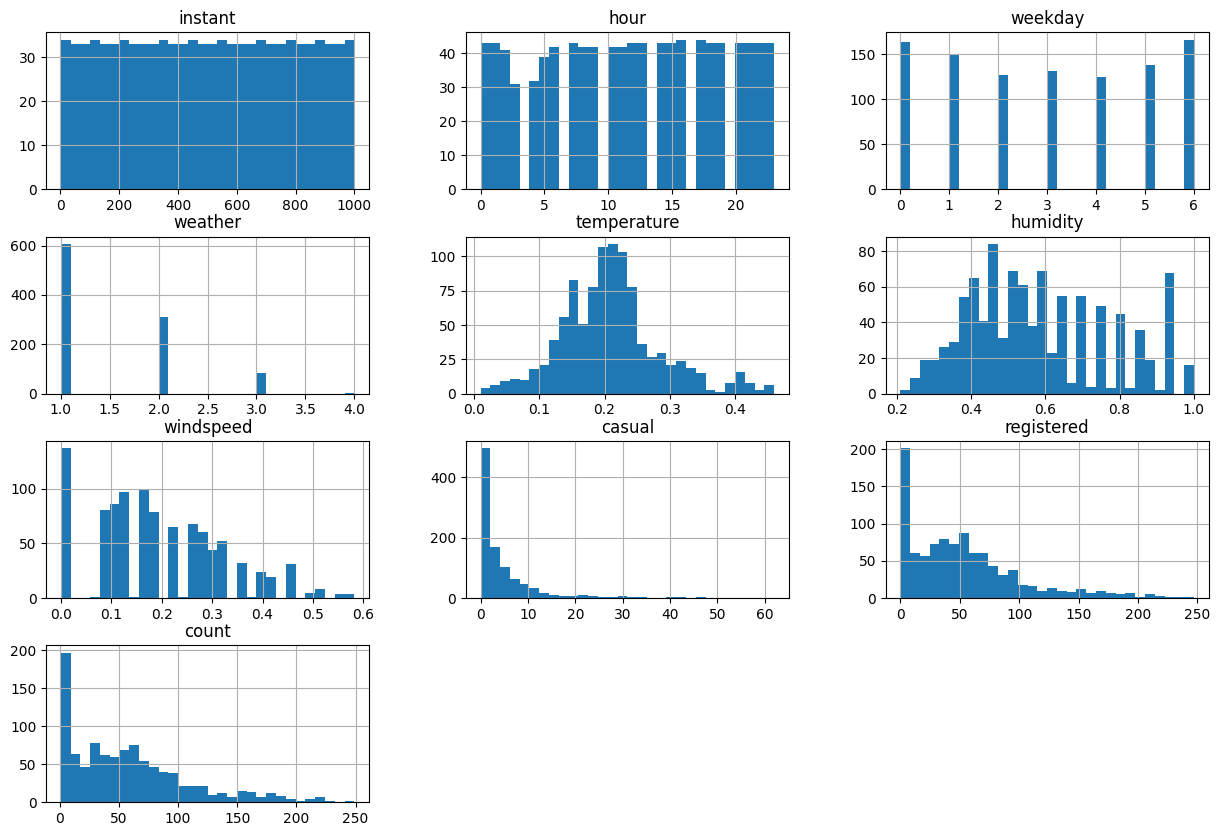

In [769]:
final_data_set[contnious_data_list].hist(bins=30, figsize=(15, 10))
plt.show()

In [770]:
correlation = final_data_set[contnious_data_list].corr()

In [771]:
# Correlation of the data
final_data_set[contnious_data_list].corr(method = 'pearson')

,instant,hour,holiday,weekday,weather,temperature,humidity,windspeed,casual,registered,count
instant,1.000000,0.000060,-0.063013,0.008157,0.030439,0.037173,0.060916,-0.056847,0.066030,0.074147,0.079521
hour,0.000060,1.000000,-0.005753,0.007531,-0.055802,0.180762,-0.193776,0.116041,0.204063,0.357228,0.366245
holiday,-0.063013,-0.005753,1.000000,-0.148682,0.165443,-0.067524,-0.037675,-0.001012,-0.001433,-0.054439,-0.051361
weekday,0.008157,0.007531,-0.148682,1.000000,0.060007,-0.068986,0.063515,-0.057121,-0.049454,0.018501,0.009917
weather,0.030439,-0.055802,0.165443,0.060007,1.000000,0.128708,0.538392,-0.178166,-0.093377,-0.119787,-0.126594
temperature,0.037173,0.180762,-0.067524,-0.068986,0.128708,1.000000,0.145289,-0.038787,0.456169,0.150096,0.209562
humidity,0.060916,-0.193776,-0.037675,0.063515,0.538392,0.145289,1.000000,-0.386268,-0.257741,-0.230582,-0.255358
windspeed,-0.056847,0.116041,-0.001012,-0.057121,-0.178166,-0.038787,-0.386268,1.000000,0.128309,0.089612,0.103437
casual,0.066030,0.204063,-0.001433,-0.049454,-0.093377,0.456169,-0.257741,0.128309,1.000000,0.336223,0.466167
registered,0.074147,0.357228,-0.054439,0.018501,-0.119787,0.150096,-0.230582,0.089612,0.336223,1.000000,0.989928


In [772]:
final_data_set[contnious_data_list].corr(method = 'spearman')

,instant,hour,holiday,weekday,weather,temperature,humidity,windspeed,casual,registered,count
instant,1.000000,0.000475,-0.063013,0.006672,0.018992,0.075189,0.049744,-0.078832,0.038010,0.075465,0.066339
hour,0.000475,1.000000,-0.005731,0.007353,-0.057253,0.176433,-0.209869,0.108326,0.362739,0.474194,0.471900
holiday,-0.063013,-0.005731,1.000000,-0.143579,0.177432,-0.088979,-0.041066,0.015697,0.022970,-0.043124,-0.040350
weekday,0.006672,0.007353,-0.143579,1.000000,0.057059,-0.044177,0.051425,-0.072189,-0.025541,0.029366,0.026470
weather,0.018992,-0.057253,0.177432,0.057059,1.000000,0.141216,0.470001,-0.177621,-0.094527,-0.109592,-0.108838
temperature,0.075189,0.176433,-0.088979,-0.044177,0.141216,1.000000,0.151955,-0.091102,0.406329,0.195203,0.231275
humidity,0.049744,-0.209869,-0.041066,0.051425,0.470001,0.151955,1.000000,-0.408622,-0.305923,-0.295446,-0.302514
windspeed,-0.078832,0.108326,0.015697,-0.072189,-0.177621,-0.091102,-0.408622,1.000000,0.108354,0.123021,0.129901
casual,0.038010,0.362739,0.022970,-0.025541,-0.094527,0.406329,-0.305923,0.108354,1.000000,0.605146,0.667421
registered,0.075465,0.474194,-0.043124,0.029366,-0.109592,0.195203,-0.295446,0.123021,0.605146,1.000000,0.994151


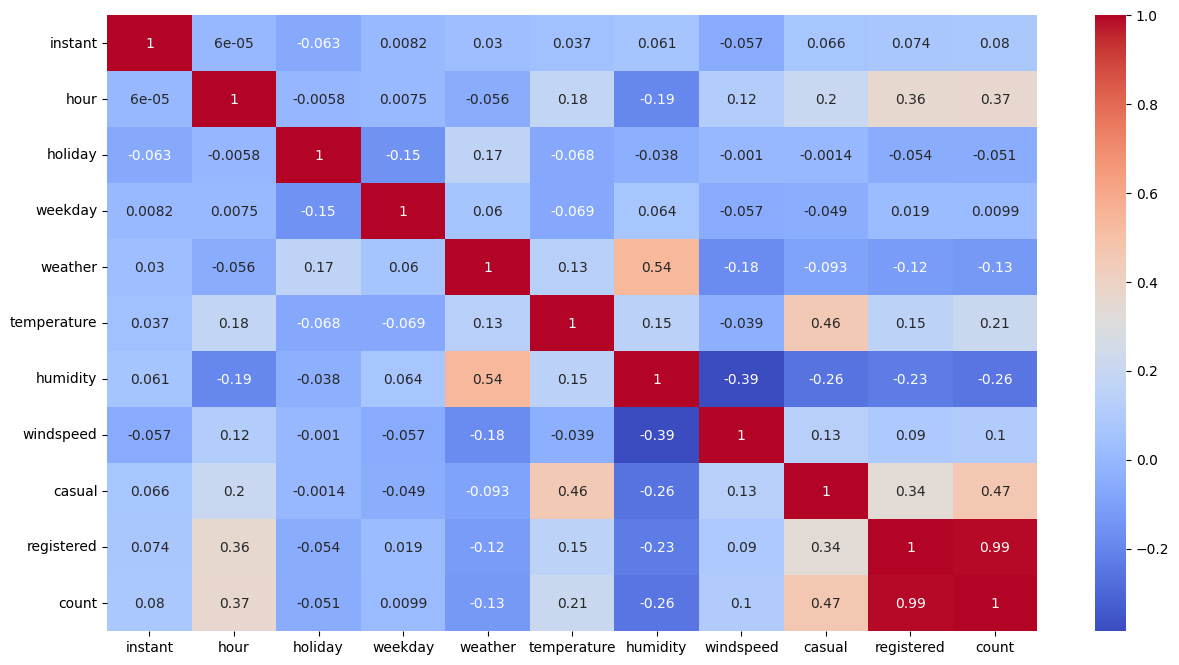

In [775]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.heatmap(final_data_set[contnious_data_list].corr(method = 'pearson'), annot = True, cmap='coolwarm')
plt.show()

Checking for any outlier

The length of the whiskers can indicate the presence of skewness in the data. If one whisker is longer than the other, it suggests that the data may be skewed in that direction.

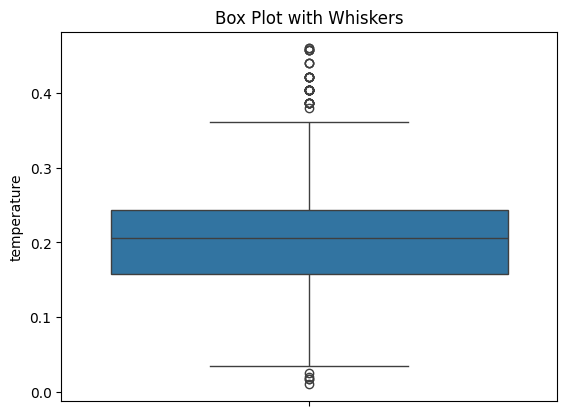

In [776]:
sns.boxplot(data=final_data_set['temperature'])
plt.title("Box Plot with Whiskers")
plt.show()

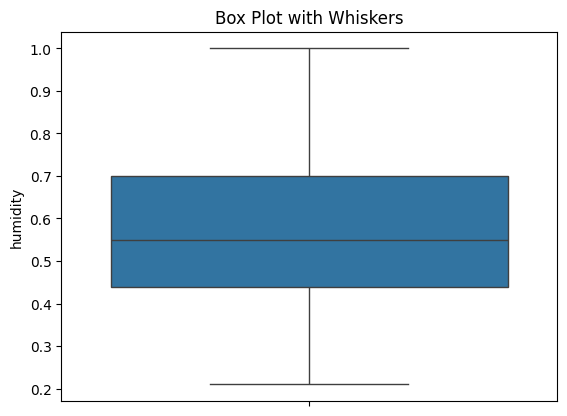

In [777]:
sns.boxplot(data=final_data_set['humidity'])
plt.title("Box Plot with Whiskers")
plt.show()

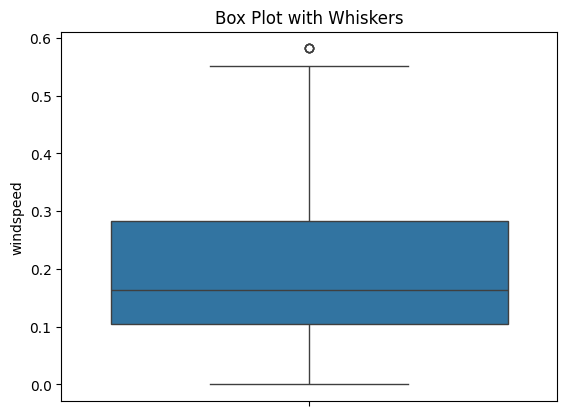

In [778]:
sns.boxplot(data=final_data_set['windspeed'])
plt.title("Box Plot with Whiskers")
plt.show()